In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.ticker as ticker
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
%matplotlib inline
import re
from os import listdir
from os.path import isfile, join

In [2]:
def ReadData(policyList):
    fullDf = None
    for i in range(0, len(policyList)):
        policy = policyList[i]
        dFilename = 'phase2/' + policy + "_reward.csv"
        dataFrame = pd.read_csv(dFilename)
        if (i == 0):
            fullDf = dataFrame
        else:
            fullDf = pd.concat([dataFrame, fullDf], axis=0)
    return fullDf

In [3]:
# Load Data
# Generating All graphs for Simulation
print("Generating Simulated Graphs")
fullDf = ReadData(policyList)
rlDf = ReadData(['PPO', 'DQN'])

Generating Simulated Graphs


In [4]:
# Setup SNS settings
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8, "axes.facecolor": "0.95"})
columnwidth = 3.40067
linewidth = 7.00137
#columnwidth = 9.40067
#linewidth = 21.00137
sns.set_context("paper", rc={"font.size":2,"axes.titlesize":2,"axes.labelsize":8})   


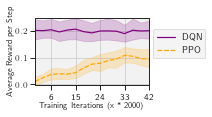

In [5]:
# Cumulative Reward Plot
dashes = [[7,7], [5,5]]
palette = ['purple', 'orange']
plot = sns.lineplot(data=rlDf, ci=99, x="Iteration", y="Score", hue="Policy", palette=palette, style="Policy")

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0, 0.8)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
# Plot Settings# Plot Settings
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)
plot.legend(loc=2, bbox_to_anchor=(1, 0.9), frameon=True)

plot.set_xticks([3, 6, 9, 12, 15])
plot.set_xticklabels([6, 15, 24, 33, 42])
plt.xlabel("Training Iterations (x * 2000)",labelpad=0.3)
plt.ylabel("Average Reward per Step",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()
plt.savefig("phase2/rl_reward.pgf", bbox_inches = 'tight', pad_inches = 0) 

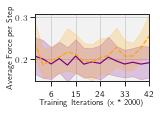

In [6]:
dashes = [[7,7], [5,5]]
palette = ['purple', 'orange']
plot = sns.lineplot(data=rlDf, ci=99, x="Iteration", y="Force", hue="Policy", palette=palette, style="Policy", legend=None)

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0, 0.8)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
# Plot Settings# Plot Settings
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)

#plt.xlabel("Human Count",labelpad=0)
#plt.ylabel("Force",labelpad=0.3)
plot.set_xticks([3, 6, 9, 12, 15])
plot.set_xticklabels([6, 15, 24, 33, 42])
plt.xlabel("Training Iterations (x * 2000)",labelpad=0.3)
plt.ylabel("Average Force per Step",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()
plt.savefig("phase2/rl_force.pgf", bbox_inches = 'tight', pad_inches = 0) 

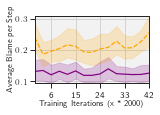

In [7]:
# Cumulative Reward Plot
dashes = [[7,7], [5,5]]
palette = ['purple', 'orange']
plot = sns.lineplot(data=rlDf, ci=99, x="Iteration", y="Blame", hue="Policy", palette=palette, style="Policy", legend=None)

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0, 0.8)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
# Plot Settings# Plot Settings
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)

#plt.xlabel("Human Count",labelpad=0)
#plt.ylabel("Force",labelpad=0.3)
plot.set_xticks([3, 6, 9, 12, 15])
plot.set_xticklabels([6, 15, 24, 33, 42])
plt.xlabel("Training Iterations (x * 2000)",labelpad=0.3)
plt.ylabel("Average Blame per Step",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()
plt.savefig("phase2/rl_blame.pgf", bbox_inches = 'tight', pad_inches = 0) 

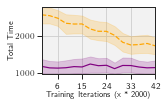

In [8]:
# Cumulative Reward Plot
dashes = [[7,7], [5,5]]
palette = ['purple', 'orange']
plot = sns.lineplot(data=rlDf, ci=99, x="Iteration", y="Total Time", hue="Policy", palette=palette, style="Policy", legend=None)

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0, 0.8)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
# Plot Settings# Plot Settings
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)
#plt.xlabel("Human Count",labelpad=0)
#plt.ylabel("Force",labelpad=0.3)
plot.set_xticks([3, 6, 9, 12, 15])
plot.set_xticklabels([6, 15, 24, 33, 42])
plt.xlabel("Training Iterations (x * 2000)",labelpad=0.3)
plt.ylabel("Total Time",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()
plt.savefig("phase2/rl_time.pgf", bbox_inches = 'tight', pad_inches = 0) 

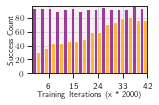

In [9]:
histDf = rlDf[rlDf.Success == 1]
dashes = [[7,7], [5,5]]
palette = ['purple', 'orange']
plot = sns.histplot(data=histDf, x="Iteration", hue="Policy", palette=palette, multiple='dodge', bins=15,  legend=None)

# Plot Settings
#plt.xlim(2, 20)
#plt.ylim(0, 0.8)
plt.tight_layout()
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(w=0.25*linewidth, h=0.15*linewidth)
# Plot Settings# Plot Settings
#plt.xticks(fontsize=6)
#plt.yticks(fontsize=6)
#plt.setp(plot.get_legend().get_texts(), fontsize='6') # for legend text
#plt.setp(plot.get_legend().get_title(), fontsize='6') # fo90,r legend title,
#plot.legend(loc=2, bbox_to_anchor=(1, 0.9), frameon=True)

#plt.xlabel("Human Count",labelpad=0)
#plt.ylabel("Force",labelpad=0.3)
plot.set_xticks([3, 6, 9, 12, 15])
plot.set_xticklabels([6, 15, 24, 33, 42])
plot.set_yticks([0, 20, 40, 60, 80, 100])
plt.xlabel("Training Iterations (x * 2000)",labelpad=0.3)
plt.ylabel("Success Count",labelpad=0.3)
plt.margins(0,0)
plt.grid()
#plt.show()
plt.savefig("phase2/rl_success.pgf", bbox_inches = 'tight', pad_inches = 0) 